# Imports and data loading

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#tomado de https://www.kaggle.com/code/wailinnoo/intrusion-detection-system-using-kdd99-dataset
import pandas as pd
from tensorflow.keras.utils import get_file

try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise

print(path)

# This file is a CSV, just no CSV extension or headers
# Download from: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
pd_data_frame = pd.read_csv(path, header=None)

# The CSV file has no column heads, so add them
pd_data_frame.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

#describe the dataset
#transform nominal features using a one hot vector encoding
pd_data_frame.describe()




/root/.keras/datasets/kddcup.data_10_percent.gz


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing and  Dummy encoding transformation

Attacks fall into four main categories:






1.   DOS: denial-of-service, e.g. syn flood;
2.   R2L: unauthorized access from a remote machine, e.g. guessing password;

3. U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;

4. probing: surveillance and other probing, e.g., port scanning.


It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only.

Neptune is the most frequent attack in the dataset, consisting in a type of denial-of-service (DoS) attack overwhelming systems with SYN requests (ynchronize request, is a type of network packet used in the TCP handshake to initiate a connection between a client and a server).

**In this work we will focus in the detection of backdrop attacks**.

In [ ]:
# For now, just drop NA's (rows with missing values), in case there are
pd_data_frame.dropna(inplace=True,axis=1)

# Checkng for DUPLICATE values
pd_data_frame.drop_duplicates(keep='first', inplace = True)
print(pd_data_frame.describe())



            duration     src_bytes     dst_bytes           land  \
count  145586.000000  1.455860e+05  1.455860e+05  145586.000000   
mean      132.025181  7.995700e+03  2.859780e+03       0.000137   
std      1224.157053  1.820383e+06  6.080979e+04       0.011720   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  1.470000e+02  1.050000e+02       0.000000   
75%         0.000000  2.880000e+02  1.164750e+03       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   145586.000000  145586.000000  145586.000000      145586.000000   
mean         0.020201       0.000048       0.100174           0.000515   
std          0.239368       0.010150       1.426798           0.028585   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

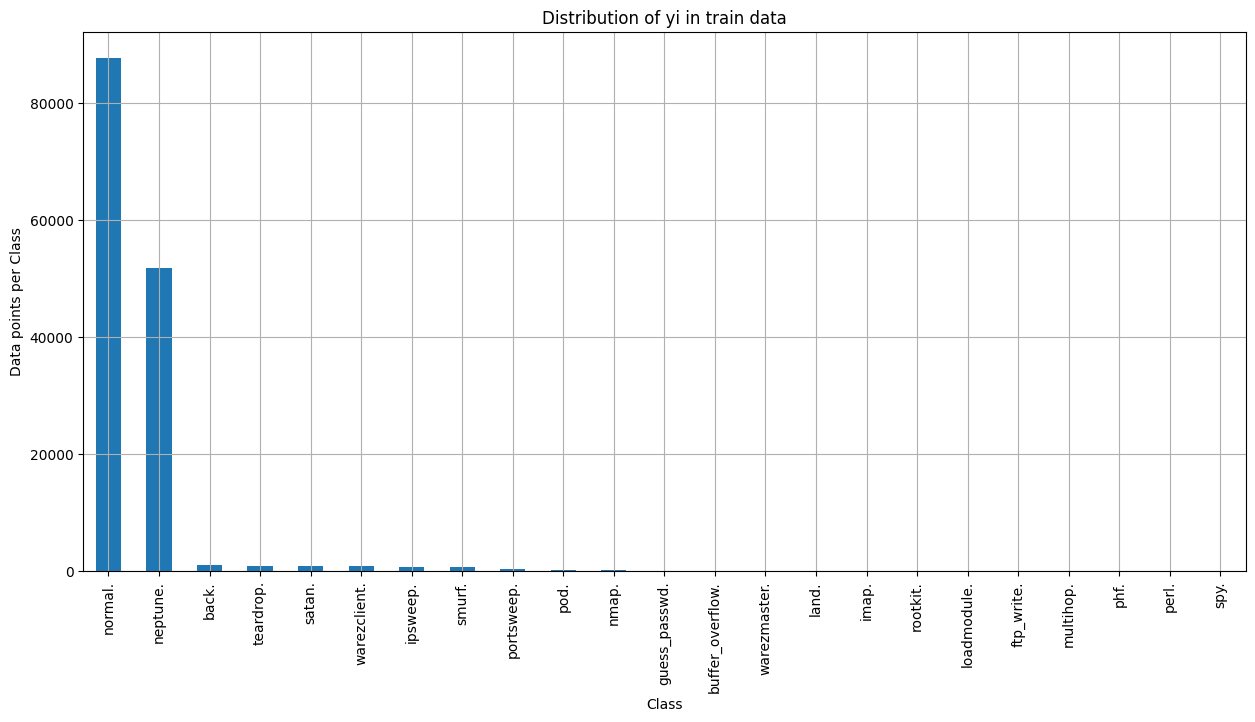

In [ ]:
# distribution of the attack categories (outcome)
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = pd_data_frame['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

#normal and neptune are the more prominent classes

In [ ]:
# Filter the DataFrame to keep only 'normal.' and 'neptune.' outcomes
filtered_df = pd_data_frame[pd_data_frame['outcome'].isin(['normal.', 'back.'])].copy()

# Display the head of the new DataFrame
display(filtered_df.head())

# Display the value counts of the 'outcome' column in the new DataFrame to verify the filtering
display(filtered_df.describe())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,88800.000000,8.880000e+04,8.880000e+04,88800.000000,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000
mean,186.876059,1.841420e+03,3.768686e+03,0.000011,0.0,0.000034,0.069662,0.000203,0.794887,0.041340,...,139.716318,202.922106,0.854742,0.045972,0.121897,0.025207,0.002346,0.001192,0.056238,0.054262
std,1313.879378,3.623510e+04,3.931359e+04,0.003356,0.0,0.010067,0.919667,0.021747,0.403786,4.236703,...,102.206888,85.696364,0.294697,0.154868,0.259896,0.049351,0.030791,0.016464,0.220121,0.213595
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.930000e+02,2.250000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,34.000000,166.000000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.420000e+02,6.330000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,132.000000,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.210000e+02,2.507000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
list_nominal_features = ["flag", "protocol_type", "service"]

# Apply one-hot encoding to the nominal features
df_encoded = pd.get_dummies(filtered_df, columns=list_nominal_features)

# Convert boolean columns (from one-hot encoding) to integers (0 or 1) in df_encoded
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Display the first few rows of the modified DataFrame to verify
print("DataFrame with boolean columns converted to integers:")
display(df_encoded.describe())
print("Columns after nominal attributes encoded: ")
for i in df_encoded.columns:
  print(i)


DataFrame with boolean columns converted to integers:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_red_i,service_shell,service_smtp,service_ssh,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i
count,88800.000000,8.880000e+04,8.880000e+04,88800.000000,88800.0,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,...,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000,88800.000000
mean,186.876059,1.841420e+03,3.768686e+03,0.000011,0.0,0.000034,0.069662,0.000203,0.794887,0.041340,...,0.000011,0.000011,0.108086,0.000011,0.002466,0.000011,0.000023,0.000394,0.000158,0.004977
std,1313.879378,3.623510e+04,3.931359e+04,0.003356,0.0,0.010067,0.919667,0.021747,0.403786,4.236703,...,0.003356,0.003356,0.310490,0.003356,0.049600,0.003356,0.004746,0.019849,0.012555,0.070376
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.930000e+02,2.250000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.420000e+02,6.330000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.210000e+02,2.507000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Columns after nominal attributes encoded: 
duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
outcome
flag_OTH
flag_REJ
flag_RSTO
flag_RSTR
flag_S0
flag_S1
flag_S2
flag_S3
flag_SF
protocol_type_icmp
protocol_type_tcp
protocol_type_udp
service_IRC
service_X11
service_auth
service_domain
service_domain_u
service_eco_i
service_ecr_i
service_finger
service_ftp
service_ftp_data
service_http
service_ntp_u
service_other
service_pop_3
service_private
service_red_i
service_shel

# Data Descriptive Analysis

In [ ]:
#Lets analyze the data of each category, using common statistic moments

# Create a DataFrame for attacks (attack_detected == 1)
df_attacks = df_encoded[df_encoded['outcome'] == 'back.'].copy()

# Create a DataFrame for no attacks (attack_detected == 0)
df_no_attacks = df_encoded[df_encoded['outcome'] == 'normal.'].copy()

# Display the first few rows of each new DataFrame to verify
print("DataFrame with attacks:")
display(df_attacks.describe())

print("\nDataFrame with no attacks:")
display(df_no_attacks.describe())

DataFrame with attacks:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_red_i,service_shell,service_smtp,service_ssh,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i
count,968.000000,968.000000,968.000000,968.0,968.0,968.0,968.000000,968.0,968.0,968.000000,...,968.0,968.0,968.0,968.0,968.0,968.0,968.0,968.0,968.0,968.0
mean,0.293388,53666.892562,8129.908058,0.0,0.0,0.0,1.917355,0.0,1.0,0.924587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.660627,4722.463858,919.138524,0.0,0.0,0.0,0.314076,0.0,0.0,0.264193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,13140.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,54540.000000,8314.000000,0.0,0.0,0.0,2.000000,0.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,54540.000000,8314.000000,0.0,0.0,0.0,2.000000,0.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,54540.000000,8314.000000,0.0,0.0,0.0,2.000000,0.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,14.000000,54540.000000,8315.000000,0.0,0.0,0.0,3.000000,0.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



DataFrame with no attacks:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_red_i,service_shell,service_smtp,service_ssh,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i
count,87832.000000,8.783200e+04,8.783200e+04,87832.000000,87832.0,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,...,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000,87832.000000
mean,188.932394,1.270249e+03,3.720620e+03,0.000011,0.0,0.000034,0.049299,0.000205,0.792627,0.031606,...,0.000011,0.000011,0.109277,0.000011,0.002493,0.000011,0.000023,0.000398,0.000159,0.005032
std,1320.952947,3.601777e+04,3.952684e+04,0.003374,0.0,0.010123,0.903317,0.021867,0.405427,4.258875,...,0.003374,0.003374,0.311988,0.003374,0.049872,0.003374,0.004772,0.019958,0.012624,0.070761
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.920000e+02,1.930000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.400000e+02,6.120000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.190000e+02,2.431000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
